In [ ]:
#pip install pandas matplotlib seaborn numpy missingno scikit-learn unidecode rapidfuzz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from unicodedata import normalize
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedGroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re
import unidecode
from rapidfuzz.distance import Levenshtein
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import warnings
from xgboost import XGBRegressor

In [1]:
print('hola chicos')

hola chicos


RECATEGORIZACIÓN PUESTOS

In [ ]:
warnings.filterwarnings("ignore")

df = pd.read_csv(r'./resultado_grupo11.csv')

df = df.dropna(subset=['final_salary'])

# Step 2: Load values from CorreccionPrediccionKaggle.csv
correccion_df = pd.read_csv(r'./CorreccionPrediccionKaggle.csv')
correccion_df = correccion_df.rename(columns={'unamed_2': 'unnamed_2'})


# Step 3: Concatenate the dataframes
df = pd.concat([df, correccion_df], ignore_index=True)

# Step 4: Save to a new CSV (optional)
df.to_csv(r'./resultado_grupo11_nuevo.csv', index=False)

# Step 5: creation of company_many, company_counts, title_many, title_counts
df['company_count'] = df['company'].str.split('|').str.len().fillna(0)
df['title_count'] = df['title'].str.split('|').str.len().fillna(0)

# Create binary variables (1 if count > 1, 0 otherwise)
df['company_many'] = (df['company_count'] > 1).astype(int)
df['title_many'] = (df['title_count'] > 1).astype(int)



#RECATEGORIZACIÓN PUESTOS

def categorizar_puesto(puesto):
    if "Programador" in puesto or "Desarrollador" in puesto:
        return "Programación / Desarrollo"
    elif "Analista" in puesto or "Data" in puesto or "BI" in puesto:
        return "Análisis / Ciencia de Datos"
    elif "Soporte" in puesto or "Sistemas" in puesto or "Redes" in puesto or "Microinformática" in puesto or 'Operador de Explotación' in puesto:
        return "Soporte / Sistemas / Redes"
    elif "Consultor" in puesto:
        return "Consultoría IT"
    elif "Jefe" in puesto or "Director" in puesto or "Responsable" in puesto or 'Gestor' in puesto or 'Otros - Dirección, Gerencia' in puesto or 'Product Manager'in puesto:
        return "Gestión / Dirección"
    elif "Marketing" in puesto or "SEO" in puesto or "SEM" in puesto or "Social Media" in puesto or 'Community' in puesto:
        return "Marketing / Digital"
    elif "Diseñador" in puesto or "Maquetador" in puesto or "Usabilidad" in puesto or 'Webmaster' in puesto:
        return "Diseño / UX / Web"
    elif "Arquitecto" in puesto or "Ingeniero" in puesto or 'Bases de Datos' in puesto or 'Cloud' in puesto:
        return "Arquitectura / Ingeniería"
    elif "Calidad" in puesto or "QA" in puesto:
        return "Calidad / Testing"
    elif "Seguridad" in puesto or "Ciberseguridad" in puesto:
        return "Ciberseguridad"
    elif "Administrativo" in puesto or 'Técnico' in puesto:
        return "Administración"
    elif 'Otros - Informática' in puesto:
        return 'Otros-informática'
    else:
        return "Otros / No especificado"

df["categoria"] = df["position"].apply(categorizar_puesto)



SALARIO POR PROVINCIAS (Datos extra)


In [ ]:

ruta = r"./salarios_medios_comunidad.csv"
df2 = pd.read_csv(ruta, sep=';')

# Diccionario de provinces a comunidades
province_a_comunidad = {
    'Almería': 'Andalucía',
    'Cádiz': 'Andalucía',
    'Córdoba': 'Andalucía',
    'Granada': 'Andalucía',
    'Huelva': 'Andalucía',
    'Jaén': 'Andalucía',
    'Málaga': 'Andalucía',
    'Sevilla': 'Andalucía',
    'Huesca': 'Aragón',
    'Teruel': 'Aragón',
    'Zaragoza': 'Aragón',
    'Asturias': 'Asturias, Principado de',
    'Islas Baleares': 'Balears, Illes',
    'Las Palmas': 'Canarias',
    'Santa Cruz de Tenerife': 'Canarias',
    'Cantabria': 'Cantabria',
    'Ávila': 'Castilla y León',
    'Burgos': 'Castilla y León',
    'León': 'Castilla y León',
    'Palencia': 'Castilla y León',
    'Salamanca': 'Castilla y León',
    'Segovia': 'Castilla y León',
    'Soria': 'Castilla y León',
    'Valladolid': 'Castilla y León',
    'Zamora': 'Castilla y León',
    'Albacete': 'Castilla - La Mancha',
    'Ciudad Real': 'Castilla - La Mancha',
    'Cuenca': 'Castilla - La Mancha',
    'Guadalajara': 'Castilla - La Mancha',
    'Toledo': 'Castilla - La Mancha',
    'Barcelona': 'Cataluña',
    'Girona': 'Cataluña',
    'Lleida': 'Cataluña',
    'Tarragona': 'Cataluña',
    'Alicante': 'Comunitat Valenciana',
    'Castellón': 'Comunitat Valenciana',
    'Valencia': 'Comunitat Valenciana',
    'Badajoz': 'Extremadura',
    'Cáceres': 'Extremadura',
    'A Coruña': 'Galicia',
    'Lugo': 'Galicia',
    'Ourense': 'Galicia',
    'Pontevedra': 'Galicia',
    'Madrid': 'Madrid, Comunidad de',
    'Murcia': 'Murcia, Región de',
    'Navarra': 'Navarra, Comunidad Foral de',
    'Álava': 'País Vasco',
    'Guipúzcoa': 'País Vasco',
    'Vizcaya': 'País Vasco',
    'La Rioja': 'Rioja, La'
}

# Verificar que todas las provincias existen en el diccionario
provincias_desconocidas = set(df['province']) - set(province_a_comunidad.keys())
if provincias_desconocidas:
    raise ValueError(f"Provincias no reconocidas en el diccionario: {provincias_desconocidas}")

# Añadir columna con comunidad a partir de la province
df['Comunidad'] = df['province'].map(province_a_comunidad)

# Filtrar df2 para quedarnos solo con las medias de 2023
df2_filtrado = df2[
    (df2['Medidas y percentiles'] == 'Media') &
    (df2['Periodo'] == 2023)
]

# Crear diccionario Comunidad → Total (salario medio)
comunidad_a_valor = df2_filtrado.set_index('Comunidades autónomas')['Total'].to_dict()

# Verificar que todas las comunidades existen en el diccionario
comunidades_desconocidas = set(df['Comunidad']) - set(comunidad_a_valor.keys())
if comunidades_desconocidas:
    raise ValueError(f"Comunidades sin salario medio en df2: {comunidades_desconocidas}")

# Mapear salario medio a cada province
df['Salario Medio 2023'] = df['Comunidad'].map(comunidad_a_valor)

# Eliminar la columna 'Comunidad' si existe
if 'Comunidad' in df.columns:
    df = df.drop(columns=['Comunidad'])

# Renombrar la columna de salario
df = df.rename(columns={'Salario Medio 2023': 'mean_salary_province'})





In [ ]:
print(df['mean_salary_province'].dtype)

object


In [ ]:
print(df.dtypes)

uuid                     object
company                  object
title                    object
position                 object
province                 object
city                     object
date_of_birth            object
unnamed                  object
unnamed_2               float64
skills                   object
final_salary            float64
company_count           float64
title_count             float64
company_many              int64
title_many                int64
categoria                object
mean_salary_province     object
dtype: object


In [ ]:

#corrección de formato de salario
df['mean_salary_province'] = df['mean_salary_province'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [ ]:
# Palabras clave por grupo
junior_keywords = ['junior', 'asistente', 'formador', 'sin especificar', 'maquetador', 'técnico administrativo']
senior_keywords = ['senior', 'experto', 'especialista', 'arquitecto', 'analista', 'data scientist']
manager_keywords = ['jefe', 'responsable', 'director', 'manager', 'scrum master', 'account manager']

# Definición de la función de clasificación
def clasificar_rango(pos):
    pos_lower = pos.lower()
    if any(keyword in pos_lower for keyword in manager_keywords):
        return 'manager'
    elif any(keyword in pos_lower for keyword in senior_keywords):
        return 'senior'
    elif any(keyword in pos_lower for keyword in junior_keywords):
        return 'junior'
    else:
        if 'técnico' in pos_lower or 'programador' in pos_lower:
            return 'junior'
        else:
            return 'senior'

# Aplicar la clasificación al DataFrame
df['rank'] = df['position'].apply(clasificar_rango)


In [ ]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,unnamed,unnamed_2,skills,final_salary,company_count,title_count,company_many,title_many,categoria,mean_salary_province,rank
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024-09-26,3.966667,NaN,18000.0,1.0,5.0,0,1,Soporte / Sistemas / Redes,35052.21,junior
1,b7d37dbe-df25-4cc8-9666-c5d6ffa4420f,COMUNIDAD DE REGANTES EL CARRACILLO,GESTOR DE BASES DE DATOS Y CARTOGRAFIA DIGITAL,Administrador de Bases de Datos,Valladolid,Iscar,1970-02-07T00:00:00.000Z,2022-11-08,2.366667,"[""Adobe Illustrator"",""Microsoft Exchange Serve...",18000.0,1.0,1.0,0,0,Arquitectura / Ingeniería,27360.49,senior
2,56d91d22-a24e-41ba-8460-d0ddd5698c7e,BANESTO,Analista Programador | Analista | Consultor té...,Responsable de Calidad,Madrid,Madrid,1963-09-14T00:00:00.000Z,2012-12-27,14.797222,NaN,42000.0,1.0,6.0,0,1,Gestión / Dirección,35052.21,manager
3,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018-09-11,21.902778,NaN,42000.0,1.0,4.0,0,1,Gestión / Dirección,35052.21,manager
4,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022-11-08,11.580556,NaN,18000.0,1.0,2.0,0,1,Gestión / Dirección,27085.50,manager


In [ ]:
df['company'] = df['company'].apply(lambda x: str(x).upper())

df['company'].replace(['-', '--', 'NAN'], 'UNKNOWN',inplace = True)

df['skills'] = df['skills'].apply(lambda x: 0 if pd.isna(x) else 1)

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

df['unnamed'] = pd.to_datetime(df['unnamed'], errors='coerce')

df['age'] = ((pd.Timestamp.now().tz_localize('UTC') - df['date_of_birth']).dt.days / 365.25).astype(int)

df['unnamed_years'] = ((pd.Timestamp.now() - df['unnamed']).dt.days / 365.25).astype(float)

df['unnamed_years'].replace(np.nan, df['unnamed_years'].median(), inplace = True)

df.drop(['city', 'date_of_birth', 'unnamed'], axis = 1, inplace = True)


# SPLIT

df_test = df.loc[pd.isna(df['final_salary'])]

y_test = df_test['final_salary']

X_test = df_test.drop(['final_salary'], axis = 1)

df_train = df.dropna(subset = ['final_salary'])

y_train = df_train['final_salary']

X_train = df_train.drop(['final_salary'], axis = 1)

In [ ]:
df['title_count'].max()
df['company_count'].max()


np.float64(29.0)

In [ ]:
df.to_csv(r'./datos_salarios_limpios_0739.csv', sep=';', index=False)

CARGAMOS LOS DATOS NUEVOS

In [ ]:
# --- Paso 1: Cargar datos ---
df_total = pd.read_csv(r'./datos_salarios_limpios_0739.csv', sep=";")

# Identificamos columnas numéricas a escalar (sin incluir 'final_salary' ni 'company')
numerical_cols = df_total.select_dtypes(include=['number']).columns.tolist()
numerical_cols = df_total.select_dtypes(include=['number']).columns
for col in df_total.columns:
    print(f"{col}: {df_total[col].dtype}")

uuid: object
company: object
title: object
position: object
province: object
unnamed_2: float64
skills: int64
final_salary: float64
company_count: float64
title_count: float64
company_many: int64
title_many: int64
categoria: object
mean_salary_province: float64
rank: object
age: int64
unnamed_years: float64


In [ ]:
# --- 1. Función para limpieza avanzada del nombre de empresa ---
def clean_company_advanced(name):
    if pd.isnull(name):
        return ""
    name = str(name).split('|')[0].strip()             # Tomar solo la primera empresa si hay separador "|"
    name = name.lower()                                # Pasar a minúsculas
    name = unidecode.unidecode(name)                   # Eliminar acentos
    name = re.sub(r'[^a-z0-9\s]', '', name)            # Eliminar caracteres especiales
    blacklist = [
        'sa', 's a', 'sl', 's.l', 's.a', 'ltda', 'empresa',
        'compania', 'compañia', 'corp', 'corporacion', 'group',
        'grupo', 'holding', 'inc', 'co', 'ltd', 'the'
    ]
    pattern = r'\b(' + '|'.join(blacklist) + r')\b'
    name = re.sub(pattern, '', name)                   # Eliminar palabras vacías comunes
    name = re.sub(r'\s+', ' ', name).strip()           # Eliminar espacios duplicados
    return name

# --- 2. Aplicar limpieza y seleccionar primeras 100 empresas únicas ---
df_total['company_clean'] = df_total['company'].apply(clean_company_advanced)
df_total['company_clean'] = df_total['company_clean'].str.strip()

sample_names = df_total['company_clean'].dropna().unique()

In [ ]:
# --- Paso 2: Codificar 'rank' (ordinal) ---
rank_mapping = {'junior': 0, 'senior': 1, 'manager': 2}
df_total['rank_encoded'] = df_total['rank'].map(rank_mapping)

# --- Paso 3: One-Hot Encoding de 'categoria' y 'cluster'  ---
df_total = pd.get_dummies(df_total, columns=['categoria'])
#df_total = pd.get_dummies(df_total, columns=['cluster'])

# Mostramos el tipo de cada columna
for col in df_total.columns:
    print(f"{col}: {df_total[col].dtype}")

uuid: object
company: object
title: object
position: object
province: object
unnamed_2: float64
skills: int64
final_salary: float64
company_count: float64
title_count: float64
company_many: int64
title_many: int64
mean_salary_province: float64
rank: object
age: int64
unnamed_years: float64
company_clean: object
rank_encoded: int64
categoria_Administración: bool
categoria_Análisis / Ciencia de Datos: bool
categoria_Arquitectura / Ingeniería: bool
categoria_Calidad / Testing: bool
categoria_Ciberseguridad: bool
categoria_Consultoría IT: bool
categoria_Diseño / UX / Web: bool
categoria_Gestión / Dirección: bool
categoria_Marketing / Digital: bool
categoria_Otros / No especificado: bool
categoria_Otros-informática: bool
categoria_Programación / Desarrollo: bool
categoria_Soporte / Sistemas / Redes: bool


In [ ]:
# --- Paso 4: Identificar columnas numéricas a escalar ---
numerical_cols = df_total.select_dtypes(include=['number']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'final_salary']
# Mostramos el tipo de cada columna
for col in numerical_cols:
    print(f"{col}: {df_total[col].dtype}")

unnamed_2: float64
skills: int64
company_count: float64
title_count: float64
company_many: int64
title_many: int64
mean_salary_province: float64
age: int64
unnamed_years: float64
rank_encoded: int64


In [ ]:
# Inicializar el scaler
scaler = StandardScaler()

# Guardar una copia sin escalar para luego separar por compañía y aplicar medias
df_scaled = df_total.copy()

# Aplicar escalado a las columnas seleccionadas
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [ ]:
# Columnas que empiezan por 'categoria_' tras el one-hot encoding
categoria_cols = [col for col in df_total.columns if col.startswith('categoria_')]
cluster_cols = [col for col in df_total.columns if col.startswith('cluster_')]

# Definir features finales: avg_salary_by_company + columnas numéricas + columnas one-hot de categoria
features = numerical_cols + categoria_cols + cluster_cols

print("Features finales usadas:")
for f in features:
    print(f)

Features finales usadas:
unnamed_2
skills
company_count
title_count
company_many
title_many
mean_salary_province
age
unnamed_years
rank_encoded
categoria_Administración
categoria_Análisis / Ciencia de Datos
categoria_Arquitectura / Ingeniería
categoria_Calidad / Testing
categoria_Ciberseguridad
categoria_Consultoría IT
categoria_Diseño / UX / Web
categoria_Gestión / Dirección
categoria_Marketing / Digital
categoria_Otros / No especificado
categoria_Otros-informática
categoria_Programación / Desarrollo
categoria_Soporte / Sistemas / Redes


In [ ]:
# --- Paso 5: Separar por si final_salary está presente ---
df = df_total[df_total['final_salary'].notnull()].copy()
df_kaggle = df_total[df_total['final_salary'].isnull()].copy()

# --- Paso 6: Dividir en train y test ---
df_train, df_test = train_test_split(df, test_size=0.2, random_state=33)


# Entrenamiento
X_train = df_train[features]
y_train = df_train['final_salary']

# Test
X_test = df_test[features]
y_test = df_test['final_salary']

# Kaggle (para predicción futura)
X_kaggle = df_kaggle[features]

# Modelos

In [ ]:
seed = 55
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor(random_state=seed)))

def boxplots_algorithms(results, names):

    plt.figure(figsize=(9, 3))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [ ]:
results = []
names = []

for name, model in models:

    scores = cross_val_score(model, X_train, y_train,
                             cv=10,  # 5-fold CV
                             scoring='neg_mean_squared_error')

    results.append(-scores)  # Para que sea positivo el MSE
    names.append(name)

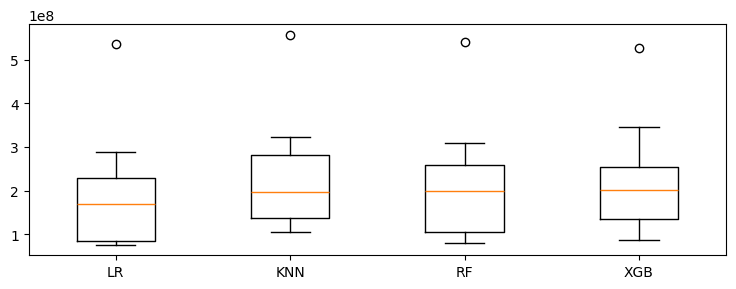

In [ ]:
boxplots_algorithms(results, names)

# XGBoost Fine tuning

In [ ]:
params = {
    'booster': ['gbtree', 'dart'],
    'eta': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [12, 24, 48, 96, 192],
    'max_depth': [3, 9, 27],
    'min_child_weight': [3, 5, 10],
    'gamma': [0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [1, 2, 5, 25, 125],
    'reg_alpha': [0, 0.5, 1]
}


random_search_RF = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=seed),
    param_distributions=params,
    n_iter=100,
    cv=10,
    scoring='neg_mean_squared_error',
    refit=True,
    verbose=1,
    n_jobs=-1,
    random_state=seed
)

outlier_model = LinearRegression()

In [ ]:
random_search_RF.fit(X_train, y_train)

random_search_RF.cv_results_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'mean_fit_time': array([ 4.86042786,  2.78453145,  0.242395  , 15.16452239,  0.22541413,
        21.98483579,  2.56936538,  3.16818328,  0.04274633,  0.98275044,
         0.02531607,  0.04675553,  0.3894819 ,  0.03826878, 17.86815972,
        12.46563728,  0.05296729,  0.4785115 ,  0.34631293,  0.25087578,
         0.05423872,  0.06325564,  0.2185272 ,  0.31434624,  0.06492069,
         0.23623283,  0.03603508,  9.93649826,  3.4595854 ,  1.02935655,
         0.07201886,  0.0724138 ,  0.04968245, 10.5867409 ,  1.45748906,
         0.10201247,  0.11335037,  0.30107796,  0.07672791,  0.06029494,
         0.13545289,  0.32480912,  0.05059786,  2.6204577 ,  0.68865578,
         0.10079308,  0.18298843,  0.10416801,  0.27716665,  0.1534354 ,
         0.03047447,  0.04307394,  0.06686172,  0.38840361,  2.6483567 ,
         0.02872667, 10.43904104,  1.42998981,  0.08951972,  0.06067405,
         0.09489107,  0.19001901,  0.05481298,  0.10561864,  0.11418233,
        10.58251619,  1.67870126, 

In [ ]:
outlier_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
XGBest = random_search_RF.best_estimator_

filename = 'finalized_model.sav'
pickle.dump(XGBest, open(filename, 'wb'))

XGBest

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=0.3,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=192, n_jobs=None, ...)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

# Predict on training data using the best estimator
y_train_pred = XGBest.predict(X_train)
y_train_out = outlier_model.predict(X_train)

# Calculate RMSE on training data
train_mse = mean_squared_error(y_train, y_train_pred*0.97 + y_train_out * 0.03)
train_rmse = train_mse ** 0.5
print("Train RMSE:", train_rmse)


y_test_pred = XGBest.predict(X_test)
y_test_out = outlier_model.predict(X_test)

test_rmse = mean_squared_error(y_test, y_test_pred*0.97 + 0.03*y_test_out) ** 0.5
print("Test RMSE:", test_rmse)

Train RMSE: 11947.78334028344
Test RMSE: 12559.076939550294


In [ ]:
y_kaggle= XGBest.predict(X_kaggle)*0.97 + 0.03 * outlier_model.predict(X_kaggle)

import pandas as pd

# Supongamos que tienes un DataFrame con los IDs de las filas de test
# Por ejemplo, si tus IDs están en una columna llamada 'uuid' en X_kaggle:
# Si X_kaggle no tiene esa columna, tendrás que cargarla aparte o tener un array con esos IDs.

# Si X_kaggle es un DataFrame con la columna 'uuid':
ids = df_kaggle['uuid']  # Extraemos los ids

# Si no, si tienes un array o lista aparte con los ids, usa esa variable

# Ya tienes la predicción:
final_salary = y_kaggle  # resultado de xgb_reg.predict(X_kaggle)

# Construimos un DataFrame con las dos columnas requeridas
submission = pd.DataFrame({
    'uuid': ids,
    'real_salary': final_salary
})

# Guardamos a CSV sin índice porque normalmente las competiciones piden sin índice
submission.to_csv('submission.csv', index=False)